In [ ]:
# подключение библиотек
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd
import pylab
import plotly as px
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps

# отрисовка изображений в ноутбуке, а не в консоль или файл
%matplotlib inline

# Задание Ultra Light
Задание Ultra Lite
Макс 10 баллов
Перепишите ноутбук по распознаванию рукописных цифр, восстановив следующие операции:

1. Импорт библиотек.
2. Загрузка базы mnist.
3. Нормирование и преобразование x_train и y_train.
4. Создание нейронной сети.
5. Обучение нейронной сети.
*Можно смотреть в ноутбук с занятия, но код необходимо писать самостоятельно.

11493376/11490434 [==============================] - 0s 0us/step
 Размерность входных данных  (60000, 28, 28)
Пример картинки


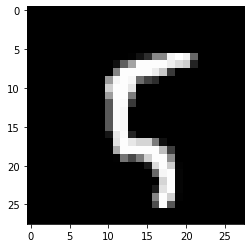

In [ ]:
# загрузка базы mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
print(' Размерность входных данных ',x_train_org.shape)
# для примера выведем одну картинку
n = 100
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB'))
print('Пример картинки')
plt.show()

In [ ]:
# требуется поменять форму данных и нормализовать
x_train = x_train_org.reshape(x_train_org.shape[0],x_train_org.shape[1]*x_train_org.shape[2])
x_test = x_test_org.reshape(x_test_org.shape[0],x_test_org.shape[1]*x_test_org.shape[2])
print('Размерность x_train: ', x_train.shape)
print('Размерность x_test: ', x_test.shape)
# нормализуем данные
print('Тип входных данных',type(x_train[0][0]))
# данные int - переведем во float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# нормируем на 255
x_train = x_train / 255
x_test = x_test / 255
# приводим y к формату one_hot_encoding
y_train = utils.to_categorical(y_train_org,10)
y_test = utils.to_categorical(y_test_org,10)
print('Размерность y_train: ', y_train.shape)
print('Размерность y_test: ', y_test.shape)

Размерность x_train:  (60000, 784)
Размерность x_test:  (10000, 784)
Тип входных данных <class 'numpy.uint8'>
Размерность y_train:  (60000, 10)
Размерность y_test:  (10000, 10)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 884)               693940    
_________________________________________________________________
dense_28 (Dense)             (None, 256)               226560    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                2570      
Total params: 923,070
Trainable params: 923,070
Non-trainable params: 0
_________________________________________________________________
Графическое представление модели


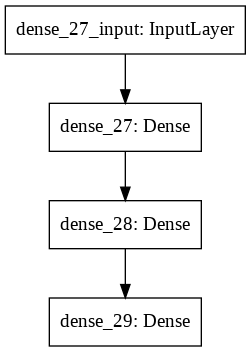

In [ ]:
# создание нейронной сети
model_light = Sequential()
model_light.add(Dense(884, input_dim = x_train.shape[1], activation='relu'))
model_light.add(Dense(256, activation='relu'))
model_light.add(Dense(10, activation='softmax'))

model_light.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
model_light.summary()
print('Графическое представление модели')
plot_model(model_light)

In [ ]:
# обучение нейронной сети
model_light.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 3s 2ms/step - loss: 0.3804 - accuracy: 0.8886
Epoch 2/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0765 - accuracy: 0.9768
Epoch 3/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0466 - accuracy: 0.9851
Epoch 4/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0332 - accuracy: 0.9901
Epoch 5/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0209 - accuracy: 0.9936
Epoch 6/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0210 - accuracy: 0.9932
Epoch 7/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0151 - accuracy: 0.9948
Epoch 8/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0150 - accuracy: 0.9948
Epoch 9/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0115 - accuracy: 0.9962
Epoch 10/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0132 - accuracy: 0.9957

accuracy = 99.74%

#Задание Lite

Проведите серию экспериментов по перебору гиперпараметров нейронной сети, созданной на занятии.

1. Поменяйте количество нейронов в первом скрытом слое сети, используя следующие значения:

- один слой 10 нейронов
- один слой 100 нейронов
- один слой 5000 нейронов

2. Поменяйте активационную функцию во всех скрытых слоях с relu на linear.

3. Поменяйте размеры batch_size:

- 1
- 10
- 100
- вся база (60000)


4. Напишите выводы по результатам проведенных тестов.

In [ ]:
# создание нейронной сети - первый слой на 10 нейронов
model_10 = Sequential()
model_10.add(Dense(10, input_dim = x_train.shape[1], activation='relu'))
model_10.add(Dense(10, activation='softmax'))

model_10.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
# обучение нейронной сети
model_10.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
469/469 [==============================] - 1s 2ms/step - loss: 1.2666 - accuracy: 0.6114
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.8990
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.3134 - accuracy: 0.9117
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2842 - accuracy: 0.9193
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2706 - accuracy: 0.9230
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9240
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2619 - accuracy: 0.9257
Epoch 8/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2502 - accuracy: 0.9290
Epoch 9/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2450 - accuracy: 0.9303
Epoch 10/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2321 - accuracy: 0.9330

accuracy = 94.79%, ошибка медленно уменьшается

In [ ]:
# создание нейронной сети - первый слой на 100 нейронов
model_100 = Sequential()
model_100.add(Dense(100, input_dim = x_train.shape[1], activation='relu'))
model_100.add(Dense(10, activation='softmax'))

model_100.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
# обучение нейронной сети
model_100.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
469/469 [==============================] - 1s 2ms/step - loss: 0.6458 - accuracy: 0.8204
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1845 - accuracy: 0.9473
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1356 - accuracy: 0.9624
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1024 - accuracy: 0.9714
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9756
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9802
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0584 - accuracy: 0.9832
Epoch 8/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0498 - accuracy: 0.9856
Epoch 9/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0436 - accuracy: 0.9877
Epoch 10/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9902

accuracy = 99.93%

In [ ]:
# создание нейронной сети - первый слой на 5000 нейронов
model_5000 = Sequential()
model_5000.add(Dense(5000, input_dim = x_train.shape[1], activation='relu'))
model_5000.add(Dense(10, activation='softmax'))

model_5000.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
# обучение нейронной сети
model_5000.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8949
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0745 - accuracy: 0.9778
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0463 - accuracy: 0.9854
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0279 - accuracy: 0.9922
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0200 - accuracy: 0.9934
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0129 - accuracy: 0.9959
Epoch 8/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0161 - accuracy: 0.9949
Epoch 9/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0074 - accuracy: 0.9974
Epoch 10/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0100 - accuracy: 0.9968

accuracy = 99.74% 
когда создаем слой на большое количество нейронов возникает биение точности при обучении - не возрастание а скачки
следовательно большое количество нейронов находит слишком много признаком и происходит переобучение

для данной задачи не целесообразно выбирать большое количество нейронов

In [ ]:
# создание нейронной сети - Linear 
model_linear = Sequential()
model_linear.add(Dense(884, input_dim = x_train.shape[1], activation='linear'))
model_full.add(Dense(256, activation='linear'))
model_linear.add(Dense(10, activation='softmax'))

model_linear.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
# обучение нейронной сети
model_linear.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 1s 2ms/step - loss: 0.4843 - accuracy: 0.8546
Epoch 2/15
469/469 [==============================] - 1s 2ms/step - loss: 0.3295 - accuracy: 0.9073
Epoch 3/15
469/469 [==============================] - 1s 2ms/step - loss: 0.3036 - accuracy: 0.9159
Epoch 4/15
469/469 [==============================] - 1s 2ms/step - loss: 0.2986 - accuracy: 0.9172
Epoch 5/15
469/469 [==============================] - 1s 2ms/step - loss: 0.2865 - accuracy: 0.9185
Epoch 6/15
469/469 [==============================] - 1s 2ms/step - loss: 0.2903 - accuracy: 0.9190
Epoch 7/15
469/469 [==============================] - 1s 2ms/step - loss: 0.2824 - accuracy: 0.9184
Epoch 8/15
469/469 [==============================] - 1s 2ms/step - loss: 0.2857 - accuracy: 0.9201
Epoch 9/15
469/469 [==============================] - 1s 2ms/step - loss: 0.2750 - accuracy: 0.9218
Epoch 10/15
469/469 [==============================] - 1s 2ms/step - loss: 0.2743 - accuracy: 0.9220

точность 92.42% - но ошибка больше на 0.2 - много больше
при линейной функции активации задача плохо решается, делаем вывод, что задача распознавания цифр - нелинейная

In [ ]:
# создание нейронной сети - batch_size = 1
model_1 = Sequential()
model_1.add(Dense(884, input_dim = x_train.shape[1], activation='relu'))
model_full.add(Dense(256, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

model_1.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
# обучение нейронной сети
model_1.fit(x_train, y_train, batch_size=1, epochs=1, verbose=1)

60000/60000 [==============================] - 92s 2ms/step - loss: 0.3722 - accuracy: 0.8923


accuracy = 89.23%

когда обучаем нейронную сеть по одной выборке - очень долгое обучение - одна эпоха - 92 секунды
точность после первой эпохи 89%

In [ ]:
# создание нейронной сети - batch_size = 10 
model_10 = Sequential()
model_10.add(Dense(884, input_dim = x_train.shape[1], activation='relu'))
model_full.add(Dense(256, activation='relu'))
model_10.add(Dense(10, activation='softmax'))

model_10.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
# обучение нейронной сети
model_10.fit(x_train, y_train, batch_size=10, epochs=15, verbose=1)

Epoch 1/15
6000/6000 [==============================] - 10s 2ms/step - loss: 0.2914 - accuracy: 0.9109
Epoch 2/15
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0932 - accuracy: 0.9721
Epoch 3/15
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0637 - accuracy: 0.9806
Epoch 4/15
6000/6000 [==============================] - 9s 2ms/step - loss: 0.0479 - accuracy: 0.9850
Epoch 5/15
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0413 - accuracy: 0.9874
Epoch 6/15
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0366 - accuracy: 0.9891
Epoch 7/15
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0336 - accuracy: 0.9903
Epoch 8/15
6000/6000 [==============================] - 9s 2ms/step - loss: 0.0345 - accuracy: 0.9909
Epoch 9/15
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0268 - accuracy: 0.9932
Epoch 10/15
6000/6000 [==============================] - 10s 2ms/step - los

accuracy = 99.45%

In [ ]:
# создание нейронной сети - batch_size = 10 0
model_100 = Sequential()
model_100.add(Dense(884, input_dim = x_train.shape[1], activation='relu'))
model_full.add(Dense(256, activation='relu'))
model_100.add(Dense(10, activation='softmax'))

model_100.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
# обучение нейронной сети
model_100.fit(x_train, y_train, batch_size=100, epochs=15, verbose=1)

Epoch 1/15
600/600 [==============================] - 2s 2ms/step - loss: 0.3686 - accuracy: 0.8890
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9770
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0497 - accuracy: 0.9841
Epoch 4/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0352 - accuracy: 0.9882
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0234 - accuracy: 0.9927
Epoch 6/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0193 - accuracy: 0.9938
Epoch 7/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0178 - accuracy: 0.9944
Epoch 8/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0175 - accuracy: 0.9943
Epoch 9/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0144 - accuracy: 0.9948
Epoch 10/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0116 - accuracy: 0.9959

accuray = 99.76%

In [ ]:
# создание нейронной сети - batch_size = 10 0
model_full = Sequential()
model_full.add(Dense(884, input_dim = x_train.shape[1], activation='relu'))
model_full.add(Dense(256, activation='relu'))
model_full.add(Dense(10, activation='softmax'))

model_full.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
# обучение нейронной сети
model_full.fit(x_train, y_train, batch_size=x_train.shape[0], epochs=15, verbose=1)

Epoch 1/15
1/1 [==============================] - 1s 511ms/step - loss: 2.3141 - accuracy: 0.1082
Epoch 2/15
1/1 [==============================] - 0s 114ms/step - loss: 1.9284 - accuracy: 0.5659
Epoch 3/15
1/1 [==============================] - 0s 122ms/step - loss: 1.5927 - accuracy: 0.7167
Epoch 4/15
1/1 [==============================] - 0s 98ms/step - loss: 1.2678 - accuracy: 0.7714
Epoch 5/15
1/1 [==============================] - 0s 86ms/step - loss: 0.9985 - accuracy: 0.7918
Epoch 6/15
1/1 [==============================] - 0s 138ms/step - loss: 0.7911 - accuracy: 0.8174
Epoch 7/15
1/1 [==============================] - 0s 95ms/step - loss: 0.6492 - accuracy: 0.8372
Epoch 8/15
1/1 [==============================] - 0s 88ms/step - loss: 0.5497 - accuracy: 0.8537
Epoch 9/15
1/1 [==============================] - 0s 121ms/step - loss: 0.4843 - accuracy: 0.8648
Epoch 10/15
1/1 [==============================] - 0s 117ms/step - loss: 0.4373 - accuracy: 0.8755
Epoch 11/15
1/1 [======

accuracy = 90.23%

**Выводы**
Количество нейронов в скрытых слоях должно иметь среднее значение (слишком большое число нейронов выделяет ненужные параметры, в то время, как малое количество нейронов, не выделяет полностью информацию)

Линейная функция активации в скрытых слоях не подходит дл решения задачи

batch_size - следует выбирать среним (32,64,128,256)

#Задание Pro

Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).

Последовательность шагов:
1. В графическом редакторе рисуем произвольную цифру.
2. Сохраняем документ и загружаем его в Colaboratory.
3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
5. Выполняем инверсию цветов, нормирование и решейп массива.
6. Выполняем распознавание собственной рукописной цифры.

Пример картинки


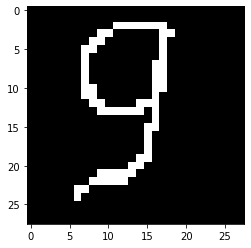

In [ ]:
# нарисовали в Paint произвольную цифру - 9
path = '/content/image_9.png'
image_9 = image.load_img(path, target_size=(28, 28), color_mode = "grayscale") 
# инвентируем в чб
image_9 = PIL.ImageOps.invert(image_9)
# преобразуем в массив нампи
image_9 = image.img_to_array(image_9) 
# решейп
image_9 = image_9.reshape(28,28)
plt.imshow(Image.fromarray(image_9).convert('RGB'))
print('Пример картинки')
plt.show()
# нормируем
image_9 = image_9.reshape(1,784)
image_9 = image_9.astype('float32')
image_9 = image_9 / 255

In [ ]:
# создание нейронной сети - batch_size = 1
model_9 = Sequential()
model_9.add(Dense(256, input_dim = x_train.shape[1], activation='relu'))
model_9.add(Dense(512, activation='relu'))
model_9.add(Dense(10, activation='softmax'))

model_9.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
# обучение нейронной сети
model_9.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 1s 2ms/step - loss: 0.4621 - accuracy: 0.8720
Epoch 2/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0944 - accuracy: 0.9709
Epoch 3/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0604 - accuracy: 0.9810
Epoch 4/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0426 - accuracy: 0.9871
Epoch 5/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0298 - accuracy: 0.9909
Epoch 6/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0228 - accuracy: 0.9924
Epoch 7/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0177 - accuracy: 0.9936
Epoch 8/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0154 - accuracy: 0.9943
Epoch 9/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.9949
Epoch 10/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0128 - accuracy: 0.9956

In [ ]:
#Распознаём все тестовые картинки
prediction = model_9.predict(image_9)

In [ ]:
prediction

array([[2.6445624e-13, 8.9416832e-01, 6.8088757e-06, 1.4198436e-03,
        5.5614333e-07, 1.0280975e-01, 4.5576060e-04, 1.4511513e-04,
        9.9392061e-04, 2.1911444e-09]], dtype=float32)

In [ ]:
np.argmax(prediction)

1

Для данной картинки сеть выводит только 1

Пример картинки


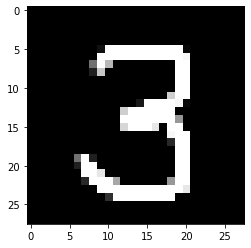

In [ ]:
# нарисовали в Paint произвольную цифру - 3
path = '/content/image_3.png'
image_3 = image.load_img(path, target_size=(28, 28), color_mode = "grayscale") 
# инвентируем в чб
image_3 = PIL.ImageOps.invert(image_3)
# преобразуем в массив нампи
image_3 = image.img_to_array(image_3) 
# решейп
image_3 = image_3.reshape(28,28)
plt.imshow(Image.fromarray(image_3).convert('RGB'))
print('Пример картинки')
plt.show()
# нормируем
image_3 = image_3.reshape(1,784)
image_3 = image_3.astype('float32')
image_3 = image_3 / 255

In [ ]:
#Распознаём все тестовые картинки
prediction = model_9.predict(image_3)

In [ ]:
prediction

array([[8.8201390e-20, 3.9867293e-18, 4.5736301e-12, 1.0000000e+00,
        6.4765417e-23, 1.1573508e-11, 1.2556649e-22, 4.9322847e-15,
        9.7012576e-10, 8.3671637e-12]], dtype=float32)

In [ ]:
np.argmax(prediction)

3

Тройку определили правильно

#Задание Ultra pro

Распознайте рукописную цифру, написанную на листе от руки.

Последовательность шагов:
1. На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер)
2. Фотографируем
3. Загружаем фото в Colaboratory.
4. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
5. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
6. Выполняем инверсию цветов, нормирование и решейп массива.
7. Выполняем распознавание собственной рукописной цифры.

Пример картинки, нарисованной от руки


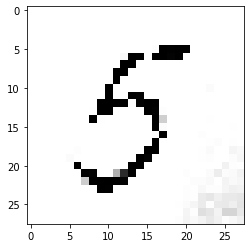

Пример картинки


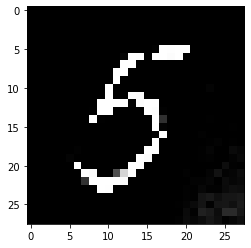

In [ ]:
# нарисовали в Paint произвольную цифру - 5
path = '/content/image_5.jpg'
image_5 = image.load_img(path, target_size=(28, 28), color_mode = "grayscale") 
# преобразуем в массив нампи
image_5 = image.img_to_array(image_5) 
# решейп
image_5 = image_5.reshape(28,28)
plt.imshow(Image.fromarray(image_5).convert('RGB'))
print('Пример картинки, нарисованной от руки')
plt.show()


# инвентируем в чб
image_5 = image.load_img(path, target_size=(28, 28), color_mode = "grayscale") 
image_5 = PIL.ImageOps.invert(image_5)
# преобразуем в массив нампи
image_5 = image.img_to_array(image_5) 
image_5 = image_5.reshape(28,28)
plt.imshow(Image.fromarray(image_5).convert('RGB'))
print('Пример картинки')
plt.show()
# нормируем
image_5 = image_5.reshape(1,784)
image_5 = image_5.astype('float32')
image_5 = image_5 / 255

In [ ]:
#Распознаём все тестовые картинки
prediction = model_9.predict(image_5)

In [ ]:
prediction  

array([[6.1645513e-14, 7.9826967e-14, 1.2204851e-12, 1.3350704e-07,
        5.0616434e-13, 9.9999380e-01, 5.6920503e-11, 2.5765512e-13,
        2.2622055e-09, 6.0370344e-06]], dtype=float32)

In [ ]:
np.argmax(prediction)

5